# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Ramadhan Ihsani Yulfa
- **Email:** ihsani.yulfa@gmail.com
- **ID Dicoding:** ramadhan_iy

Call files from Github

In [2]:
import os

# Tentukan nama folder yang akan diunduh
folder_name = "Proyek-Akhir-Dicoding-Data_Analysis"

# Periksa apakah folder sudah ada
if not os.path.exists(folder_name):
    # Jika folder belum ada, maka jalankan git clone
    !git clone https://github.com/RamadhanIY/Proyek-Akhir-Dicoding-Data_Analysis.git
else:
    print("Folder sudah ada, tidak perlu melakukan git clone.")

Cloning into 'Proyek-Akhir-Dicoding-Data_Analysis'...
remote: Enumerating objects: 59, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 59 (delta 18), reused 23 (delta 6), pack-reused 0
Receiving objects: 100% (59/59), 32.16 MiB | 18.77 MiB/s, done.
Resolving deltas: 100% (18/18), done.


## Menentukan Pertanyaan Bisnis

- Bagaimana tingkat kepuasan pelanggan berdasarkan skor ulasan yang diberikan berdasarkan kategori produk fashion yang dibeli?
- Dari negara manakah yang paling banyak dan yang paling sedikit dalam membeli produk fashion?
- Bagaimana tren retensi pelanggan dari waktu ke waktu berdasarkan Recency?
- Apakah ada pola pembelian yang konsisten dari pelanggan yang sering bertransaksi (Frequency)?

## Import Semua Packages/Library yang Digunakan

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Data Wrangling

### Gathering Data

Pada bagian ini, saya melakukan pengambilan PATH lokasi dataset, sekaligus mengubahnya ke pandas DataFrame agar dapat dilakukan analisis.

In [4]:
#PATH
path_customer = "/content/Proyek-Akhir-Dicoding-Data_Analysis/Dataset/customers_dataset.csv"
path_order_payments = "/content/Proyek-Akhir-Dicoding-Data_Analysis/Dataset/order_payments_dataset.csv"
path_order_reviews = "/content/Proyek-Akhir-Dicoding-Data_Analysis/Dataset/order_reviews_dataset.csv"
path_orders_dataset = "/content/Proyek-Akhir-Dicoding-Data_Analysis/Dataset/orders_dataset.csv"
path_product_categories = "/content/Proyek-Akhir-Dicoding-Data_Analysis/Dataset/product_category_name_translation.csv"
path_products = "/content/Proyek-Akhir-Dicoding-Data_Analysis/Dataset/products_dataset.csv"
path_sellers = "/content/Proyek-Akhir-Dicoding-Data_Analysis/Dataset/sellers_dataset.csv"
path_order_items = "/content/Proyek-Akhir-Dicoding-Data_Analysis/Dataset/order_items_dataset.csv"

Mengubah file csv menjadi pandas DataFrame

In [5]:
ds_customer = pd.read_csv(path_customer)
ds_order_payments = pd.read_csv(path_order_payments)
ds_order_reviews = pd.read_csv(path_order_reviews)
ds_orders_dataset = pd.read_csv(path_orders_dataset)
ds_product_categories = pd.read_csv(path_product_categories)
ds_products = pd.read_csv(path_products)
ds_sellers = pd.read_csv(path_sellers)
ds_order_items = pd.read_csv(path_order_items)

Memeriksa kolom pada masing-masing dataset agar dapat mengetahui kolom atau fitur mana yang akan digunakan untuk menjawab pertanyaannya.

In [6]:
dataframes = [("ds_customer", ds_customer),
              ("ds_order_payments", ds_order_payments),
              ("ds_order_reviews", ds_order_reviews),
              ("ds_orders_dataset", ds_orders_dataset),
              ("ds_product_categories", ds_product_categories),
              ("ds_products", ds_products),
              ("ds_sellers", ds_sellers),
              ("ds_order_items",ds_order_items)]

for name, df in dataframes:
    print(f"Nama kolom DataFrame {name}: {df.columns.tolist()}")

Nama kolom DataFrame ds_customer: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
Nama kolom DataFrame ds_order_payments: ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
Nama kolom DataFrame ds_order_reviews: ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
Nama kolom DataFrame ds_orders_dataset: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
Nama kolom DataFrame ds_product_categories: ['product_category_name', 'product_category_name_english']
Nama kolom DataFrame ds_products: ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'produ

Melakukan penggabungan dataset berdasarkan fitur yang dibutuhkan

In [7]:
# Untuk Pertanyaan 1
merged_df_1 = pd.merge(ds_order_items[['order_id', 'product_id']], ds_order_reviews[['order_id', 'review_score']], on='order_id')
merged_df_1 = pd.merge(merged_df_1, ds_products[['product_id', 'product_category_name']], on='product_id')
merged_df_1 = pd.merge(merged_df_1, ds_product_categories[['product_category_name', 'product_category_name_english']], on='product_category_name')
fashion_data = merged_df_1[merged_df_1['product_category_name_english'].str.startswith("fashio")]

#Untuk Pertanyaan 2
merged_df_2 = pd.merge(ds_order_items[['order_id', 'product_id']], ds_orders_dataset, on='order_id')
merged_df_2 = pd.merge(merged_df_2, ds_products[['product_id', 'product_category_name']], on='product_id')
merged_df_2 = pd.merge(merged_df_2, ds_product_categories[['product_category_name', 'product_category_name_english']], on='product_category_name')
merged_df_2 = pd.merge(merged_df_2, ds_customer[["customer_id","customer_city","customer_state"]],on = "customer_id")
fashion_data_2 = merged_df_2[merged_df_2['product_category_name_english'].str.startswith("fashio")]

#Untuk Pertanyaan 3
trend_selling_fashion = pd.merge(ds_orders_dataset[["order_id","customer_id","order_status","order_purchase_timestamp","order_approved_at"]],ds_order_items[['order_id', 'product_id','price']], on = "order_id")
trend_selling_fashion = pd.merge(trend_selling_fashion,ds_products[['product_id', 'product_category_name']], on='product_id')
trend_selling_fashion = pd.merge(trend_selling_fashion,ds_product_categories[['product_category_name', 'product_category_name_english']], on='product_category_name')
trend_selling_fashion = trend_selling_fashion[trend_selling_fashion['product_category_name_english'].str.startswith("fashio")]

merged_all = pd.merge(ds_order_items[['order_id', 'product_id']], ds_orders_dataset[["order_id","customer_id","order_status","order_purchase_timestamp","order_approved_at"]], on='order_id')
merged_all = pd.merge(merged_all, ds_order_reviews[['order_id', 'review_score']], on='order_id')
merged_all = pd.merge(merged_all,ds_products[['product_id', 'product_category_name']], on='product_id')
merged_all = pd.merge(merged_all,ds_product_categories[['product_category_name', 'product_category_name_english']], on='product_category_name')
merged_all = pd.merge(merged_all, ds_customer[["customer_id","customer_city","customer_state"]],on = "customer_id")
merged_all = merged_all[merged_all['product_category_name_english'].str.startswith("fashio")]



### Assessing Data

Assesing data kali ini adalah melakukan pemeriksaan apakah ada nilai yang hilang (missing values) dan juga terduplikat. Sekiranya ada, apakah masih bisa ditoleransikan atau perlu ditangani. Saya mengubah nama kategori yang berbahasa Inggris pada kategori fashion, karena ada salah satu kategori yang penulisannya salah, yaitu fashio_female_clothing


In [8]:
def assessing_data(dataset, change_name):

  print("Data yang Missing Values:\n")
  print(dataset.isna().sum())
  print("\nData yang terduplikat: ")
  print(dataset.duplicated().sum())


  if change_name in dataset.values:
    dataset.replace(to_replace=change_name, value="fashion_female_clothing", inplace=True)
    print("Penggantian berhasil dilakukan.")
  else:
      print("Tidak ada nilai yang diganti.")


#### Data Pertanyaan 1

In [9]:
print("Data untuk menjawab Pertanyaan 1 \n")

change_name = "fashio_female_clothing"

assessing_data(fashion_data,change_name)

Data untuk menjawab Pertanyaan 1 

Data yang Missing Values:

order_id                         0
product_id                       0
review_score                     0
product_category_name            0
product_category_name_english    0
dtype: int64

Data yang terduplikat: 
98
Penggantian berhasil dilakukan.


<ipython-input-8-c5eae0dd1dd5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.replace(to_replace=change_name, value="fashion_female_clothing", inplace=True)


#### Data Pertanyaan 2




In [10]:
print("Data untuk menjawab Pertanyaan 2 \n")

change_name = "fashio_female_clothing"

assessing_data(fashion_data_2,change_name)

Data untuk menjawab Pertanyaan 2 

Data yang Missing Values:

order_id                          0
product_id                        0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                 0
order_delivered_carrier_date     35
order_delivered_customer_date    66
order_estimated_delivery_date     0
product_category_name             0
product_category_name_english     0
customer_city                     0
customer_state                    0
dtype: int64

Data yang terduplikat: 
84
Penggantian berhasil dilakukan.


<ipython-input-8-c5eae0dd1dd5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.replace(to_replace=change_name, value="fashion_female_clothing", inplace=True)


#### Data Pertanyaan 3

In [11]:
print("Data untuk menjawab Pertanyaan 3 \n")

change_name = "fashio_female_clothing"

assessing_data(trend_selling_fashion,change_name)

Data untuk menjawab Pertanyaan 3 

Data yang Missing Values:

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
product_id                       0
price                            0
product_category_name            0
product_category_name_english    0
dtype: int64

Data yang terduplikat: 
84
Penggantian berhasil dilakukan.


### Cleaning Data

- Pada data untuk menjawab pertanyaan 1 dan data untuk menjawab pertanyaan 3, saya tidak melakukan Cleaning Data dikarenakan data ini tidak ada yang memiliki *missing values*, dan data duplikatnya masih diwajarkan karena duplikasinya terdapat pada produk yang dibeli.
- Berdasarkan dataset untuk menjawab pertanyaan 2 yang memiliki missing values, saya menggantinya dengan:

> 1. Pada kolom *order_delivered_carrier_date*, saya ganti dengan *on process*.
> 2. Pada kolom *order_delivered_customer_date*, saya ganti dengan *on delivery*

In [37]:
def columns_with_missing_values(dataframe):

    missing_columns = dataframe.columns[dataframe.isnull().any()].tolist()
    return missing_columns




In [12]:
#check missing values
missing_values = fashion_data_2[fashion_data_2.isnull().any(axis=1)]
missing_values

,order_id,product_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_category_name_english,customer_city,customer_state
43775,2a5509f085830eb1ed8de4678769c2ab,5d7c23067ed3fc8c6e699b9373d5890b,6253abaa7f49a14ed55f0b1c0e1e9455,shipped,2017-08-24 12:23:11,2017-08-24 12:30:19,2017-08-24 17:52:18,NaN,2017-09-06 00:00:00,fashion_bolsas_e_acessorios,fashion_bags_accessories,sao paulo,SP
43952,6ceb24a53abed9d619d077dc285fffb8,e338f548cda0b52650b9acfd317a74db,e70fcabf5f6bf5273ba341a46b6b83a8,shipped,2017-04-15 13:36:56,2017-04-15 13:45:18,2017-04-18 12:23:29,NaN,2017-05-24 00:00:00,fashion_bolsas_e_acessorios,fashion_bags_accessories,vila velha,ES
43981,76464635ac7911e6670c028e667ca7f0,9fe172fa8e662ca8572cf12abf8bce23,a94e78deb3579cab87a6df262fb7620c,shipped,2018-08-08 12:07:33,2018-08-08 12:15:19,2018-08-09 14:22:00,NaN,2018-08-23 00:00:00,fashion_bolsas_e_acessorios,fashion_bags_accessories,serra,ES
43991,dc8e7d66422ec37c6fa1cd4f6d29a85a,9fe172fa8e662ca8572cf12abf8bce23,d457b3332a59dfd741d7bd9bb57b73c1,shipped,2018-07-15 14:03:37,2018-07-15 14:15:14,2018-07-16 15:52:00,NaN,2018-08-02 00:00:00,fashion_bolsas_e_acessorios,fashion_bags_accessories,salvador,BA
44014,8bc9548dbe844e1bf48ac197c5609045,1d7db62a21ffb4f220d3e8a05fa77e02,d4dc57fd18dfe3e30be4d066d873d388,processing,2018-07-23 18:03:03,2018-07-24 10:32:19,NaN,NaN,2018-08-13 00:00:00,fashion_bolsas_e_acessorios,fashion_bags_accessories,fortaleza,CE
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110065,1c54750859f8472306a0b63d74e782ef,771fdcb0db87731f794a0e723e93b732,54b30cf929edf0b2c88698d991241574,processing,2017-02-25 15:37:25,2017-03-02 03:50:30,NaN,NaN,2017-03-23 00:00:00,fashion_roupa_feminina,fashion_female_clothing,sao paulo,SP
110075,39d4b3308183021b1e0b95b195b4589b,c4cca1d23088d10099f52159878b6686,226074d98d9f69790f1d87bb3b1f9cf6,shipped,2017-05-07 12:33:16,2017-05-07 13:10:09,2017-05-10 09:55:59,NaN,2017-05-31 00:00:00,fashion_roupa_feminina,fashion_female_clothing,tres rios,RJ
110094,615e54068238441742c4daf6a7b4ccff,8b100f92b312e18e03f0ee8f0c0011bd,9a66505bf502bb3d549c86dd61b38b02,invoiced,2017-11-13 16:27:09,2017-11-14 04:26:44,NaN,NaN,2017-12-01 00:00:00,fashion_roupa_feminina,fashion_female_clothing,ubatuba,SP
110977,57edfe6486364c7777241f5ab5902715,cc696680ea0cefcd5d7d5d928afb8de8,1a655f9c2a5fd2c3e77940ffdc848989,processing,2017-06-13 10:51:54,2017-06-13 11:03:07,NaN,NaN,2017-07-10 00:00:00,fashion_esporte,fashion_sport,arroio do meio,RS


Melakukan pengisian data yang kosong / missing values

In [35]:
fashion_data_2['order_delivered_carrier_date'].fillna('on process', inplace=True)
fashion_data_2['order_delivered_customer_date'].fillna('on delivery', inplace=True)

<ipython-input-35-62e3c9529fcb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fashion_data_2['order_delivered_carrier_date'].fillna('on process', inplace=True)
<ipython-input-35-62e3c9529fcb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fashion_data_2['order_delivered_customer_date'].fillna('on delivery', inplace=True)


Missing values sudah tidak ada pada Data fashion_data_2

In [38]:
recheck = columns_with_missing_values(fashion_data_2)
recheck

[]

###Download Data hasil dari Data Wrangling



Melakukan pengubahan dari pandas DataFrame ke csv, agar dapat digunakan ketika melakukan pembuatan Dashboard.

In [39]:
#Mengubah Pandas DataFrame menjadi CSV
merged_df_1.reset_index(drop=True, inplace=True)
merged_df_2.reset_index(drop=True, inplace=True)
trend_selling_fashion.reset_index(drop=True, inplace=True)
merged_all.reset_index(drop = True,inplace = True)


merged_df_1.to_csv('fashion_data_1.csv', index=False)
merged_df_2.to_csv('fashion_data_2.csv', index=False)
trend_selling_fashion.to_csv('trend_selling_fashion.csv', index=False)
merged_all.to_csv('merged_all.csv', index=False)

## Exploratory Data Analysis (EDA)

#### Explore Dataset for Question 1



Hasil penggunaan metode describe() dibawah menunjukkan rata-rata dari review pada kategori produk fashion, jumlah order kategori produk fashion, quartal 1 sampai quartal 3, nilai maksimum dan nilai minimun, serta standar deviasinya.



In [41]:
fashion_data.describe()

,review_score
count,2650.000000
mean,4.115849
std,1.318829
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Melakukan reset index, agar data dapat digunakan dalam proses EDA

In [15]:
fashion_data.reset_index()

,index,order_id,product_id,review_score,product_category_name,product_category_name_english
0,43163,00063b381e2406b52ad429470734ebd5,f177554ea93259a5b282f24e33f65ab6,5,fashion_bolsas_e_acessorios,fashion_bags_accessories
1,43164,f0496c5b6508ecfdf0af4c67896dda41,f177554ea93259a5b282f24e33f65ab6,5,fashion_bolsas_e_acessorios,fashion_bags_accessories
2,43165,f0496c5b6508ecfdf0af4c67896dda41,f177554ea93259a5b282f24e33f65ab6,5,fashion_bolsas_e_acessorios,fashion_bags_accessories
3,43166,001021efaa8636c29475e7734483457d,5d7c23067ed3fc8c6e699b9373d5890b,4,fashion_bolsas_e_acessorios,fashion_bags_accessories
4,43167,03b9c1e9a4406645c06dde26f4a704e9,5d7c23067ed3fc8c6e699b9373d5890b,5,fashion_bolsas_e_acessorios,fashion_bags_accessories
...,...,...,...,...,...,...
2645,110745,b99217b1fcf2fdeace7b8d869b76cb91,57bdf3098169cccdb62221bd3e089cbd,5,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
2646,110746,bc3ac768a8963f4ca68942ea6558fc9f,57bdf3098169cccdb62221bd3e089cbd,5,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
2647,110747,cab08f0417a702d0f4782ec02356a4ac,8cfc3506cedc0626364457d254429118,5,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
2648,110748,cb53f0b6e8f9082a9f5a113765dd1236,8cfc3506cedc0626364457d254429118,5,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


Melakukan pemeriksaan data unique, untuk melihat jumlah produk yang dijual, serta jumlah order yang terlaksana. Selain itu, saya juga menghitung jumlah order atau transaksi yang terlaksana pada masing-masing kategori produk fashion.

In [16]:
print(fashion_data.nunique())
print("\nJumlah Order berdasarkan Kategori Produk Fashion : \n")
print(fashion_data.product_category_name_english.value_counts())

order_id                         2391
product_id                       1216
review_score                        5
product_category_name               7
product_category_name_english       7
dtype: int64

Jumlah Order berdasarkan Kategori Produk Fashion : 

fashion_bags_accessories     2039
fashion_shoes                 261
fashion_male_clothing         131
fashion_underwear_beach       130
fashion_female_clothing        50
fashion_sport                  31
fashion_childrens_clothes       8
Name: product_category_name_english, dtype: int64


Memeriksa, bagaimana rata-rata review, nilai maksimum dan minimum, serta persebaran data atau standar deviasinya pada masing-masing kategori produk fashion.

In [17]:
fashion_categories = fashion_data.groupby(by = "product_category_name_english").agg(
  {
   "product_id" : "nunique",
   "order_id" : "count",
   "review_score": ["max","min","mean","std"]
  }
)
fashion_categories

product_id order_id review_score                \
                                 nunique    count          max min      mean   
product_category_name_english                                                  
fashion_bags_accessories             847     2039            5   1  4.144679   
fashion_childrens_clothes              5        8            5   1  4.500000   
fashion_female_clothing               27       50            5   1  3.780000   
fashion_male_clothing                 94      131            5   1  3.641221   
fashion_shoes                        171      261            5   1  4.233716   
fashion_sport                         19       31            5   1  4.258065   
fashion_underwear_beach               53      130            5   1  3.976923   

                                         
                                    std  
product_category_name_english            
fashion_bags_accessories       1.289027  
fashion_childrens_clothes      1.414214  
fashion_female_clothing        1.359622  
fashion_male_clothing          1.700989  
fashion_shoes                  1.259950  
fashion_sport                  1.153769  
fashion_underwear_beach        1.372292

Melakukan pemeriksaan keseluruhan rata-rata review terbesar, sekaligus jumlah reviewnya.

In [18]:

def most_reviewed_category(df):
    review_summary = df.groupby('product_category_name_english').agg({'review_score': ['count', 'mean']})

    highest_rated_category = review_summary['review_score']['mean'].idxmax()

    total_reviews = review_summary.loc[highest_rated_category, ('review_score', 'count')]

    average_rating = review_summary.loc[highest_rated_category, ('review_score', 'mean')]

    print("Kategori produk dengan rata-rata rating tertinggi:", highest_rated_category)
    print("Jumlah review:", total_reviews)
    print("Rata-rata rating:", f"{average_rating:.2f}/5")

most_reviewed_category(fashion_data)

Kategori produk dengan rata-rata rating tertinggi: fashion_childrens_clothes
Jumlah review: 8
Rata-rata rating: 4.50/5


#### Explore Dataset for Question 2


Hasil penggunaan metode describe() dibawah menunjukkan rata-rata dari review pada kategori produk fashion, jumlah order kategori produk fashion, quartal 1 sampai quartal 3, nilai maksimum dan nilai minimun, serta standar deviasinya.

In [42]:
fashion_data_2.describe()

,order_id,product_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_category_name_english,customer_city,customer_state
count,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642,2642
unique,2407,1221,2407,5,2400,2397,2279,2344,390,7,7,765,25
top,bb82809ea3ca9f3edbe589b60e14e0cb,d017a2151d543a9885604dc62a3d9dcc,d3ecf0664acdf35f6e78389ed3e223f0,delivered,2018-04-28 21:06:05,2017-10-18 12:49:41,on process,on delivery,2017-09-01 00:00:00,fashion_bolsas_e_acessorios,fashion_bags_accessories,sao paulo,SP
freq,6,140,6,2575,6,6,35,66,19,2031,2031,416,1108


Melakukan reset_index, agar indexnya diawali dari awal.

In [49]:
fashion_data_2.reset_index()
# fashion_data_2.drop("index",axis = 1) #Jika ada index dan level_0 akibat menggunakan reset_index()

,index,order_id,product_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_category_name_english,customer_city,customer_state
0,41985,f7ba0ab952e0165fed5ffae1ffff6627,183c95ad186f48c320bbac4643829d3f,ae1a0576d2d6b806f8ac488e766b7b4a,delivered,2018-04-30 11:39:31,2018-04-30 11:55:08,2018-04-30 14:12:00,2018-05-03 17:06:51,2018-05-18 00:00:00,fashion_bolsas_e_acessorios,fashion_bags_accessories,sao paulo,SP
1,43769,00063b381e2406b52ad429470734ebd5,f177554ea93259a5b282f24e33f65ab6,6a899e55865de6549a58d2c6845e5604,delivered,2018-07-27 17:21:27,2018-07-27 18:00:06,2018-07-30 14:52:00,2018-08-07 13:56:52,2018-08-07 00:00:00,fashion_bolsas_e_acessorios,fashion_bags_accessories,monte alto,SP
2,43770,f0496c5b6508ecfdf0af4c67896dda41,f177554ea93259a5b282f24e33f65ab6,a9c2657d6325c3a16a14172b79188fb8,delivered,2017-10-18 00:50:36,2017-10-18 01:10:50,2017-10-18 18:33:38,2017-10-19 18:22:01,2017-10-30 00:00:00,fashion_bolsas_e_acessorios,fashion_bags_accessories,sao paulo,SP
3,43771,f0496c5b6508ecfdf0af4c67896dda41,f177554ea93259a5b282f24e33f65ab6,a9c2657d6325c3a16a14172b79188fb8,delivered,2017-10-18 00:50:36,2017-10-18 01:10:50,2017-10-18 18:33:38,2017-10-19 18:22:01,2017-10-30 00:00:00,fashion_bolsas_e_acessorios,fashion_bags_accessories,sao paulo,SP
4,43772,001021efaa8636c29475e7734483457d,5d7c23067ed3fc8c6e699b9373d5890b,2dfbf74859104caf100df3720a1d833d,delivered,2018-02-27 09:27:14,2018-02-27 09:35:41,2018-02-27 21:43:46,2018-03-08 20:06:33,2018-03-23 00:00:00,fashion_bolsas_e_acessorios,fashion_bags_accessories,ivaipora,PR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637,111018,3da4b0f0c89bb8fee8a810459e641414,28ac6af4008a402e5039f3e042a36e13,2415312e36eac3ab3819f5b7f32522e5,delivered,2017-06-08 16:46:33,2017-06-08 18:20:19,2017-06-12 15:31:40,2017-06-13 13:23:01,2017-06-23 00:00:00,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,sao paulo,SP
2638,111019,9fa3a005f89a187501fa1bd63d6125fb,57bdf3098169cccdb62221bd3e089cbd,85485f38b20ed1e287120d30cf39ee7d,delivered,2017-10-08 23:51:49,2017-10-09 00:17:50,2017-10-10 20:52:05,2017-10-16 21:59:33,2017-11-08 00:00:00,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,sao paulo,SP
2639,111020,cab08f0417a702d0f4782ec02356a4ac,8cfc3506cedc0626364457d254429118,f4b4417d306cbf8c55ea65c89d0261f7,delivered,2017-09-30 18:54:53,2017-10-03 04:28:12,2017-10-03 18:54:12,2017-10-30 12:37:42,2017-11-01 00:00:00,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,macaubas,BA
2640,111021,cb53f0b6e8f9082a9f5a113765dd1236,8cfc3506cedc0626364457d254429118,035c08a68b237ef4afc82109e61a7380,delivered,2018-06-03 22:34:58,2018-06-03 22:50:09,2018-06-04 15:15:00,2018-06-05 21:52:02,2018-06-28 00:00:00,fashion_roupa_infanto_juvenil,fashion_childrens_clothes,sao paulo,SP


In [21]:
print(fashion_data_2.nunique())
print("\nJumlah Order berdasarkan Kategori Produk Fashion : \n",fashion_data.product_category_name_english.value_counts())

order_id                         2407
product_id                       1221
customer_id                      2407
order_status                        5
order_purchase_timestamp         2400
order_approved_at                2397
order_delivered_carrier_date     2278
order_delivered_customer_date    2343
order_estimated_delivery_date     390
product_category_name               7
product_category_name_english       7
customer_city                     765
customer_state                     25
dtype: int64

Jumlah Order berdasarkan Kategori Produk Fashion : 
 fashion_bags_accessories     2039
fashion_shoes                 261
fashion_male_clothing         131
fashion_underwear_beach       130
fashion_female_clothing        50
fashion_sport                  31
fashion_childrens_clothes       8
Name: product_category_name_english, dtype: int64


Membuat function untuk melakukan pengelompokkan data berdasarkan kolom "customer_state", dan juga melakukan perhitungan jumlah customer pada masing-masing negara bagian. Lalu saya mengubah isi kolom customer_state, yang awalnya berupa singkatan menjadi nama panjangnya.

In [22]:
def create_by_customer_state_df(df):
    by_customer_state_df = pd.DataFrame(df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending = False))
    by_customer_state_df.rename(columns={
        "customer_id": "customer_count",
    }, inplace=True)

    states = {
    'SP': 'São Paulo',
    'MG': 'Minas Gerais',
    'RJ': 'Rio de Janeiro',
    'PR': 'Paraná',
    'RS': 'Rio Grande do Sul',
    'SC': 'Santa Catarina',
    'BA': 'Bahia',
    'GO': 'Goiás',
    'ES': 'Espírito Santo',
    'DF': 'Distrito Federal',
    'PE': 'Pernambuco',
    'PA': 'Pará',
    'CE': 'Ceará',
    'MA': 'Maranhão',
    'MS': 'Mato Grosso do Sul',
    'MT': 'Mato Grosso',
    'PB': 'Paraíba',
    'RN': 'Rio Grande do Norte',
    'SE': 'Sergipe',
    'RO': 'Rondônia',
    'TO': 'Tocantins',
    'PI': 'Piauí',
    'AL': 'Alagoas',
    'AC': 'Acre',
    'AM': 'Amazonas'
    }

    by_customer_state_df.reset_index(inplace=True)
    by_customer_state_df['customer_state'] = by_customer_state_df['customer_state'].map(states)

    return by_customer_state_df

create_by_customer_state_df(fashion_data_2)

,customer_state,customer_count
0,São Paulo,1001
1,Minas Gerais,325
2,Rio de Janeiro,239
3,Paraná,142
4,Rio Grande do Sul,99
5,Santa Catarina,94
6,Bahia,93
7,Goiás,61
8,Espírito Santo,55
9,Distrito Federal,52


#### Explore Dataset for Question 3


In [23]:
trend_selling_fashion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2642 entries, 0 to 2641
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       2642 non-null   object 
 1   customer_id                    2642 non-null   object 
 2   order_status                   2642 non-null   object 
 3   order_purchase_timestamp       2642 non-null   object 
 4   order_approved_at              2642 non-null   object 
 5   product_id                     2642 non-null   object 
 6   price                          2642 non-null   float64
 7   product_category_name          2642 non-null   object 
 8   product_category_name_english  2642 non-null   object 
dtypes: float64(1), object(8)
memory usage: 185.9+ KB


Membuat function untuk melakukan proses perhitungan resensi

In [24]:
def create_rfm(df):
  df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
  rfm_df = df.groupby('customer_id')['order_purchase_timestamp'].max().sort_values(ascending = False).reset_index()

  max_date = rfm_df['order_purchase_timestamp'].max()
  rfm_df['recency'] = (max_date - rfm_df['order_purchase_timestamp']).dt.days

  return rfm_df[['customer_id', 'recency']]

In [25]:
rfm_df = create_rfm(trend_selling_fashion)
rfm_df

,customer_id,recency
0,0b5f6687d659478f1747caed607c4ec5,0
1,ea2b2f7e718f4cf14d2d4138fbe3784a,0
2,0a843597f711e82638c06f81db65eec5,4
3,e13a5ed086aacc9b2b7466c78645b468,4
4,7a89b15bf8829df6c7177436d09aa9af,4
...,...,...
2402,198b639c2da0e7f71ae2b720ad67f47d,691
2403,31a4ecf0bd3ea9436b7132bac1a1bdb3,691
2404,abd49ba4cf56e622b951f281361f56ad,691
2405,88927ff4f54b497957d9947e926ec6fe,692


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tingkat kepuasan pelanggan berdasarkan skor ulasan yang diberikan pada masing-masing kategori produk fashion yang dibeli?

In [26]:
def create_mean_review_items_df(df):
    mean_review_items_df = df.groupby(by = "product_category_name_english").review_score.mean().sort_values(ascending = False)
    return mean_review_items_df

In [27]:
mean_review_items_df = create_mean_review_items_df(fashion_data)
mean_review_items_df

product_category_name_english
fashion_childrens_clothes    4.500000
fashion_sport                4.258065
fashion_shoes                4.233716
fashion_bags_accessories     4.144679
fashion_underwear_beach      3.976923
fashion_female_clothing      3.780000
fashion_male_clothing        3.641221
Name: review_score, dtype: float64

<ipython-input-28-1fedfc7a06af>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="review_score", y="product_category_name_english", data = pd.DataFrame(mean_review_items_df), palette=colors)


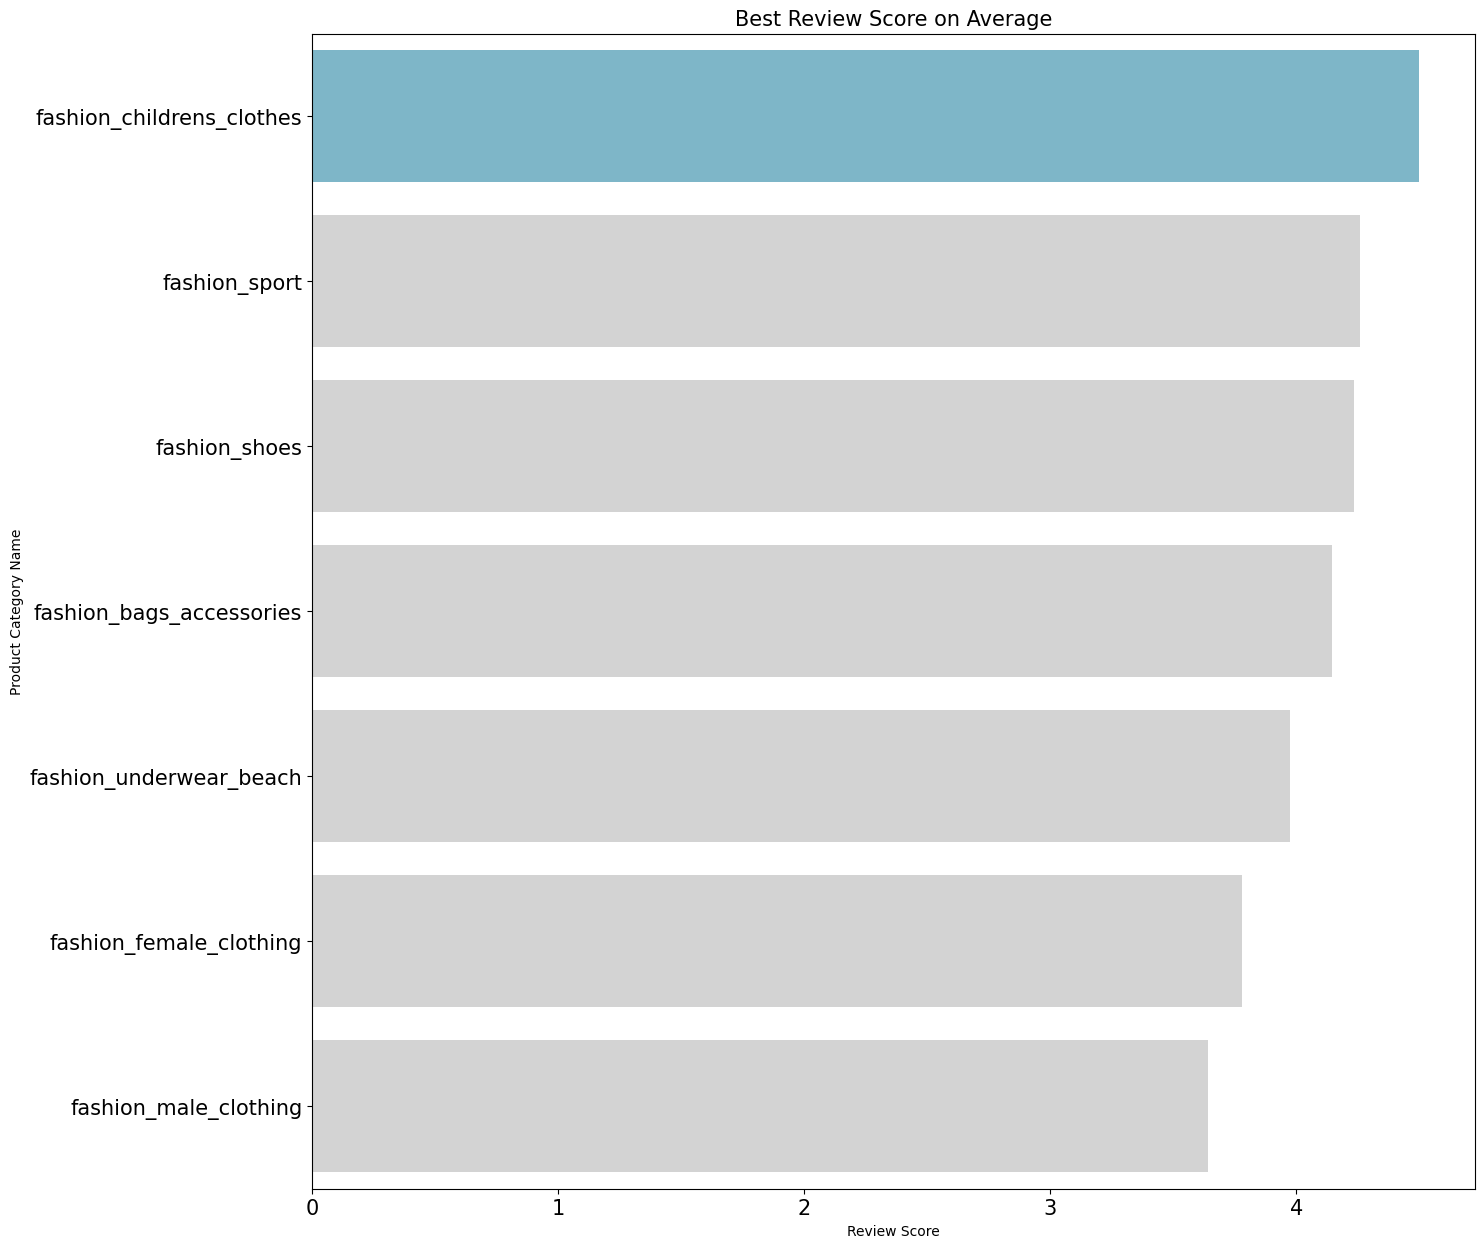

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3"]

sns.barplot(x="review_score", y="product_category_name_english", data = pd.DataFrame(mean_review_items_df), palette=colors)
ax.set_ylabel("Product Category Name")
ax.set_xlabel("Review Score")
ax.set_title("Best Review Score on Average", loc="center", fontsize=15)

ax.tick_params(axis ='x', labelsize=15)
ax.tick_params(axis ='y', labelsize=15)

Berdasarkan analisis, produk fashion pakaian anak menunjukkan rating tertinggi dengan rata-rata 4.5.Namun,Produk fashion lainnya juga memiliki rata-rata rating yang cukup tinggi, seperti produk olahraga dengan rating 4.26, sepatu dengan rating 4.23, dan aksesoris tas dengan rating 4.14. Akan tetapi, produk pakaian wanita dan pria menunjukkan rating yang sedikit lebih rendah dengan rata-rata 3.78 dan 3.64.

### Pertanyaan 2: Dari negara bagian manakah yang paling banyak dan juga paling sedikit dalam membeli produk fashion?

In [29]:
by_customer_state_df = create_by_customer_state_df(fashion_data_2)
by_customer_state_df.head(5)


,customer_state,customer_count
0,São Paulo,1001
1,Minas Gerais,325
2,Rio de Janeiro,239
3,Paraná,142
4,Rio Grande do Sul,99


In [30]:
print("Median Data: ", by_customer_state_df.customer_count.median())

Median Data:  31.0


<ipython-input-31-e4b4ba95f213>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_count", y="customer_state", data = pd.DataFrame(by_customer_state_df).head(5), palette=colors,ax = ax[0])
<ipython-input-31-e4b4ba95f213>:4: UserWarning: The palette list has more values (7) than needed (5), which may not be intended.
  sns.barplot(x="customer_count", y="customer_state", data = pd.DataFrame(by_customer_state_df).head(5), palette=colors,ax = ax[0])
<ipython-input-31-e4b4ba95f213>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_count", y="customer_state", data = pd.DataFrame(by_customer_state_df), palette=colors,ax = ax[1])
<ipython-input-31-e4b4ba95f213>:12: UserWarnin

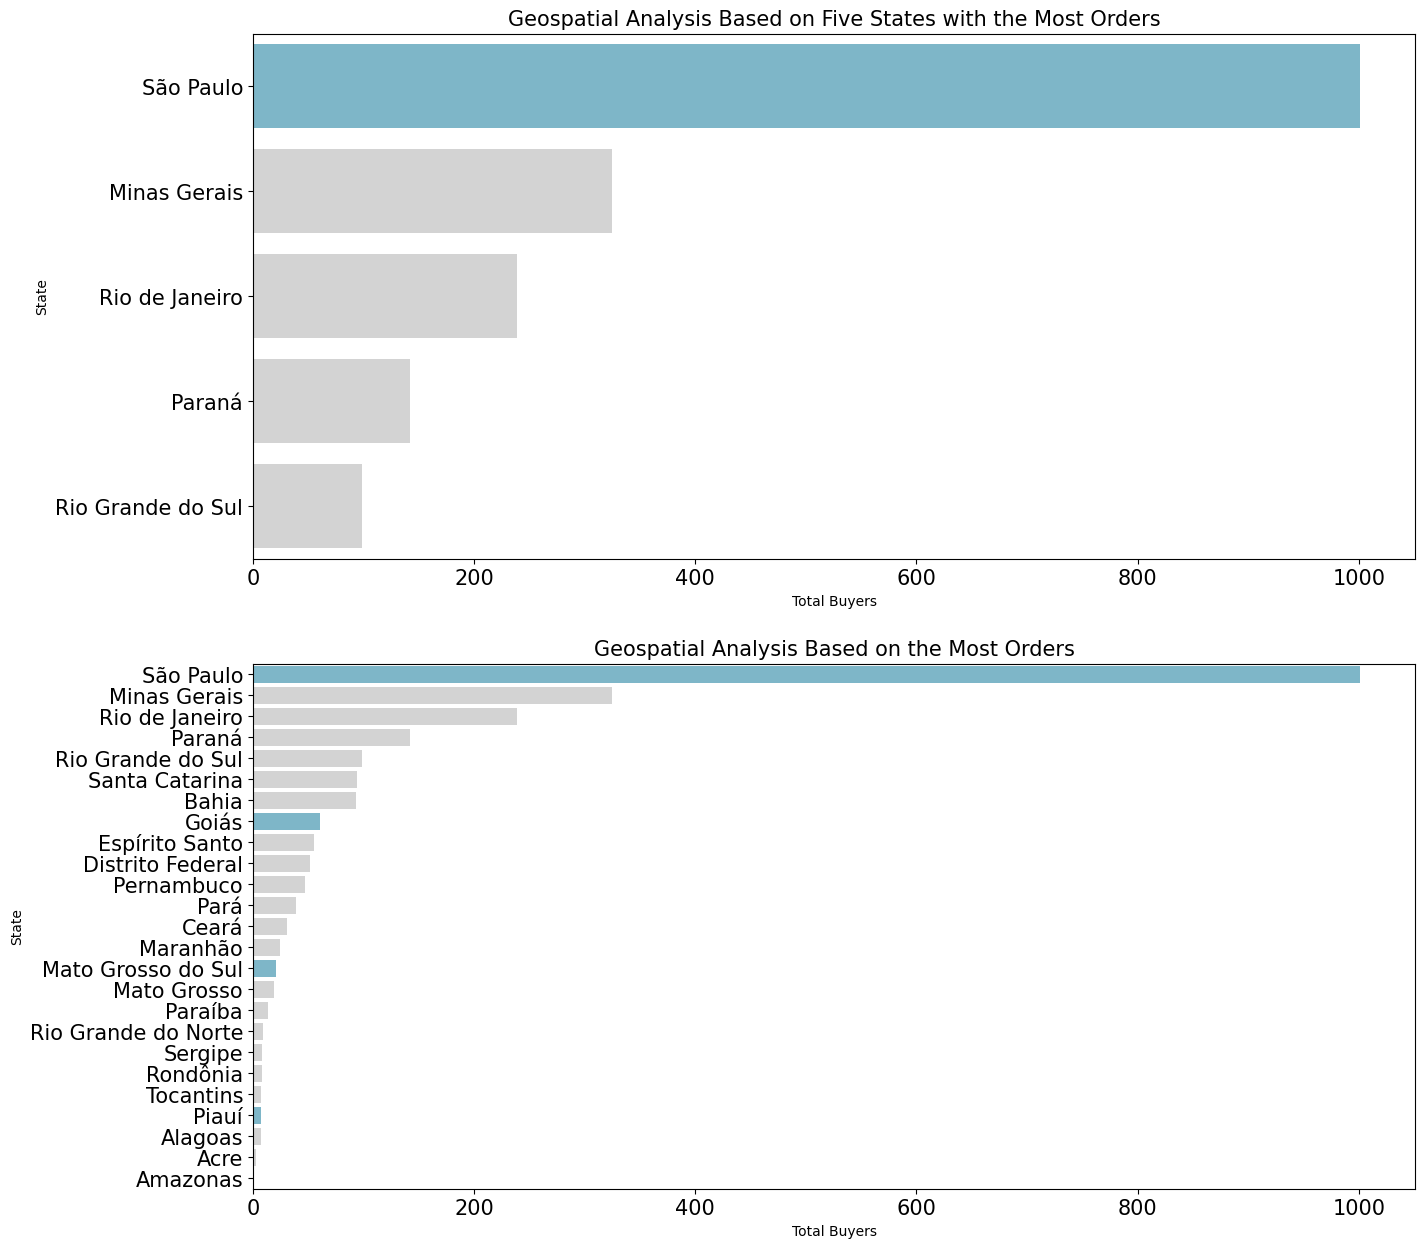

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#D3D3D3","#D3D3D3"]

sns.barplot(x="customer_count", y="customer_state", data = pd.DataFrame(by_customer_state_df).head(5), palette=colors,ax = ax[0])
ax[0].set_ylabel("State")
ax[0].set_xlabel("Total Buyers")
ax[0].set_title("Geospatial Analysis Based on Five States with the Most Orders", loc="center", fontsize=15)

ax[0].tick_params(axis ='x', labelsize=15)
ax[0].tick_params(axis ='y', labelsize=15)

sns.barplot(x="customer_count", y="customer_state", data = pd.DataFrame(by_customer_state_df), palette=colors,ax = ax[1])
ax[1].set_ylabel("State")
ax[1].set_xlabel("Total Buyers")
ax[1].set_title("Geospatial Analysis Based on the Most Orders", loc="center", fontsize=15)

ax[1].tick_params(axis ='x', labelsize=15)
ax[1].tick_params(axis ='y', labelsize=15)

Untuk 5 Negara Bagian yang melakukan pembelian terbanyak adalah

1. São Paulo: 1001 pelanggan
2. Minas Gerais: 325 pelanggan
3. Rio de Janeiro: 239 pelanggan
4. Paraná: 142 pelanggan
5. Rio Grande do Sul: 99 pelanggan

Hal ini menunjukkan bahwa São Paulo menjadi negara bagian dengan jumlah pelanggan terbanyak yang membeli produk fashion, diikuti oleh Minas Gerais, Rio de Janeiro, Paraná, dan Rio Grande do Sul.

Dibandingkan dengan negara bagian lainnya, terdapat variasi yang cukup signifikan dalam daya serap pasar. Perbedaan antara negara bagian dengan daya serap terbanyak (São Paulo) dan yang paling sedikit (Amazonas) sangatlah besar. Median dari data ini juga tergolong rendah, yaitu hanya 31. Hal ini menunjukkan bahwa terdapat disparitas yang signifikan dalam jumlah pelanggan antar negara bagian di Brazil.

### Pertanyaan 3: Bagaimana tren retensi pelanggan berdasarkan Recency?

In [32]:
print(f"Median Recency = {rfm_df['recency'].median():.2f}")

Median Recency = 277.00


In [33]:
rfm_df

,customer_id,recency
0,0b5f6687d659478f1747caed607c4ec5,0
1,ea2b2f7e718f4cf14d2d4138fbe3784a,0
2,0a843597f711e82638c06f81db65eec5,4
3,e13a5ed086aacc9b2b7466c78645b468,4
4,7a89b15bf8829df6c7177436d09aa9af,4
...,...,...
2402,198b639c2da0e7f71ae2b720ad67f47d,691
2403,31a4ecf0bd3ea9436b7132bac1a1bdb3,691
2404,abd49ba4cf56e622b951f281361f56ad,691
2405,88927ff4f54b497957d9947e926ec6fe,692


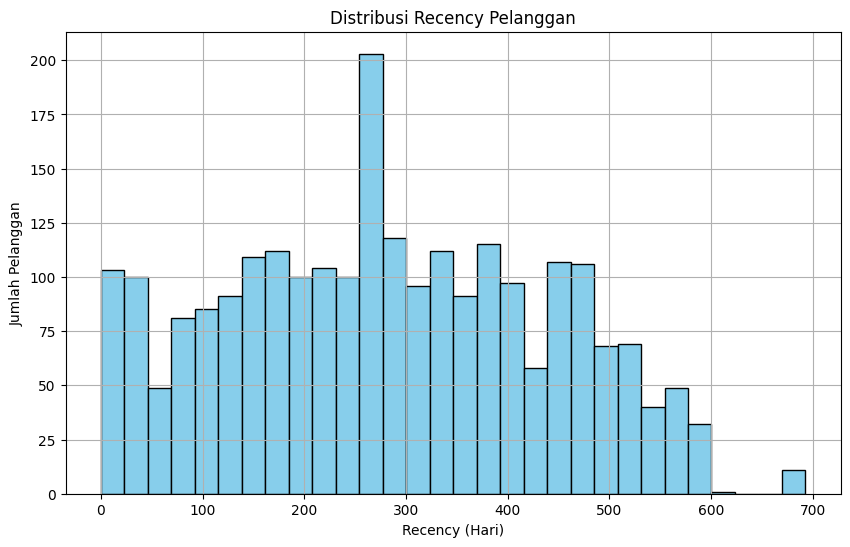

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(rfm_df['recency'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Recency Pelanggan')
plt.xlabel('Recency (Hari)')
plt.ylabel('Jumlah Pelanggan')
plt.grid(True)
plt.show()

Dari total 2407 pelanggan, berdasarkan grafik di atas dapat disimpulkan bahwa:

1. Median recency berada di sekitar 270 hari dengan jumlah pelanggan sekitar 200. Hal ini menunjukkan bahwa sebagian besar pelanggan memiliki waktu sekitar 270 hari sejak transaksi terakhir.
2. Terdapat beberapa pelanggan yang baru-baru ini melakukan interaksi dengan produk (recency = 0), menunjukkan adanya pelanggan baru yang baru saja melakukan pembelian.
3. Recency terbesar tercatat sebesar 693 hari, menunjukkan adanya sejumlah pelanggan yang sudah lama tidak melakukan transaksi.

## Conclusion

- Conclution pertanyaan 1

> Berdasarkan analisis, produk fashion pakaian anak menunjukkan rating tertinggi dengan rata-rata 4.5. Ini menandakan bahwa produk pakaian anak mendapatkan apresiasi yang tinggi dari pelanggan. Meskipun demikian, produk fashion lainnya juga memiliki rata-rata rating yang cukup tinggi. Produk olahraga memiliki rating 4.26, sepatu dengan rating 4.23, dan aksesoris tas dengan rating 4.14. Artinya, keempat produk ini dipercayai produknya oleh pelanggan.

> Di sisi lain, produk pakaian wanita dan pria menunjukkan rating yang sedikit lebih rendah, dengan rata-rata 3.78 dan 3.64 secara berturut-turut. Hal ini mungkin mengindikasikan bahwa produk pakaian wanita dan pria saat ini memiliki kualitas yang kurang baik, dan juga pelayanan toko produk wanita dan pria yang kurang ramah. Hal ini perlu diteliti lebih lanjut.


- Conclution pertanyaan 2

> Kesimpulan dari data tersebut adalah bahwa negara bagian São Paulo memiliki **jumlah pelanggan terbanyak yang melakukan pembelian produk fashion**, diikuti oleh Minas Gerais, Rio de Janeiro, Paraná, dan Rio Grande do Sul. Hal ini menunjukkan bahwa São Paulo memiliki potensi pasar yang besar dalam industri fashion di Brazil.

> Hal yang perlu dicatat adalah terdapat **variasi yang signifikan dalam daya serap pasar antar negara bagian**. Perbedaan antara negara bagian dengan jumlah pelanggan terbanyak (São Paulo) dan yang paling sedikit (Amazonas) sangat besar. Median yang rendah dari data ini (31) juga mengindikasikan disparitas yang signifikan dalam jumlah pelanggan antar negara bagian di Brazil.

> Potensi pasar yang besar di São Paulo menunjukkan bahwa wilayah ini dapat menjadi fokus utama dalam strategi pemasaran dan penjualan produk fashion. Namun, perusahaan juga harus memperhatikan potensi pasar di negara bagian lainnya yang mungkin memiliki pangsa pasar yang kurang dimanfaatkan jika dilihat dari variasi daya serapnya.

- Conclution 3

> Berdasarkan analisis recency, dapat disimpulkan bahwa mayoritas pelanggan memiliki waktu sekitar 270 hari sejak transaksi terakhir. Meskipun demikian, terdapat juga sejumlah pelanggan yang baru-baru ini melakukan interaksi dengan produk, menandakan adanya pelanggan baru atau pelanggan yang kembali bertransaksi setelah jangka waktu yang cukup lama.

> Namun, juga terdapat sejumlah pelanggan yang sudah lama tidak melakukan transaksi, yang bisa mengindikasikan adanya pelanggan tidak aktif atau beralih ke merek atau produk lain. Maka dari itu, perlu adanya improvisasi strategi *adverstising* untuk menambah *engagement rate* antara brand dengan pelanggan.